In [2]:
import pickle
from pathlib import Path
import numpy as np
# import gurobipy as gp; gp.Model()

from src.input import Input_uc, Input_suc, get_min_up_down_initials
from src.output import Output_uc
from src.unit_commitment import solve_uc
from src.stochastic_unit_commitment import solve_suc

In [3]:
def load_data():
    path_folder_processed = Path.cwd() / "data" / "input" / "processed"
    timestamp_2022 = np.load(path_folder_processed / "timestamp_2022.npy")
    
    global num_units, num_periods, time_start
    num_units = 122
    num_periods = 24
    time_start, time_end = np.datetime64("2022-07-21T00"), np.datetime64("2022-07-21T23")
    idx_time_start, idx_time_end = np.where(timestamp_2022 == time_start)[0][0], np.where(timestamp_2022 == time_end)[0][0]

    global unit_type, idx_nuclear, idx_coal, idx_lng
    unit_type = np.load(path_folder_processed / "unit_type.npy")
    idx_nuclear = np.load(path_folder_processed / "idx_nuclear.npy")
    idx_coal = np.load(path_folder_processed / "idx_coal.npy")
    idx_lng = np.load(path_folder_processed / "idx_lng.npy")

    global p_min, p_max, ramp_up, ramp_down, startup_ramp, shutdown_ramp, min_up, min_down
    p_min = np.load(path_folder_processed / "p_min.npy")
    p_max = np.load(path_folder_processed / "p_max.npy")
    ramp_up = np.load(path_folder_processed / "ramp_up.npy")
    ramp_down = np.load(path_folder_processed / "ramp_down.npy")
    startup_ramp = np.load(path_folder_processed / "startup_ramp.npy")
    shutdown_ramp = np.load(path_folder_processed / "shutdown_ramp.npy")
    min_up = np.load(path_folder_processed / "min_up.npy")
    min_down = np.load(path_folder_processed / "min_down.npy")

    global cost_lin, cost_const, cost_startup_step_old, num_cooling_steps_old, cost_startup_step, step_length
    cost_lin = np.load(path_folder_processed / "cost_lin.npy")
    cost_const = np.load(path_folder_processed / "cost_const.npy")
    cost_startup_step_old = pickle.load(open(path_folder_processed / "cost_startup_step_old.pkl", "rb"))
    num_cooling_steps_old = np.load(path_folder_processed / "num_cooling_steps_old.npy")
    cost_startup_step = np.load(path_folder_processed / "cost_startup_step.npy")
    step_length = np.load(path_folder_processed / "step_length.npy")

    global demand, renewable
    demand = np.load(path_folder_processed / "demand_2022.npy")[idx_time_start:idx_time_end+1]
    renewable = np.load(path_folder_processed / "renewable_gen_2022.npy")[idx_time_start:idx_time_end+1]

    global p_prev, u_prev, min_up_r, min_down_r, min_up_0, min_down_0
    p_prev = np.load(path_folder_processed / "p_prev.npy")
    u_prev = np.load(path_folder_processed / "u_prev.npy")
    min_up_r = np.load(path_folder_processed / "min_up_r.npy")
    min_down_r = np.load(path_folder_processed / "min_down_r.npy")
    min_up_0 = np.load(path_folder_processed / "min_up_0.npy")
    min_down_0 = np.load(path_folder_processed / "min_down_0.npy")

    global thermal_demand_scenario
    thermal_demand_scenario = np.load(path_folder_processed / "thermal_demand_2022721_tk.npy")

In [4]:
load_data()

In [5]:
input_uc = Input_uc(
    # meta
    unit_type=unit_type,
    idx_nuclear=idx_nuclear,
    idx_coal=idx_coal,
    idx_lng=idx_lng,
    num_units=num_units,
    num_periods=num_periods,
    # system
    demand=demand,
    reserve=None,
    renewable=renewable, # probably will use for the last stage RT evaluation
    # generator
    p_min=p_min,
    p_max=p_max,
    ramp_up=ramp_up,
    ramp_down=ramp_down,
    startup_ramp=startup_ramp,
    shutdown_ramp=shutdown_ramp,
    min_up=min_up,
    min_down=min_down,
    # cost function - generation
    cost_lin=cost_lin,
    cost_const=cost_const,
    # cost function - startup (paper formulation)
    cost_startup_step=cost_startup_step,
    step_length=step_length,
    # cost function - startup (lecture note formulation)
    cost_startup_step_old=cost_startup_step_old,
    num_cooling_steps_old=num_cooling_steps_old,
    # initial conditions
    p_prev=p_prev,
    u_prev=u_prev,
    min_up_r=min_up_r,
    min_down_r=min_down_r,
    min_up_0=min_up_0,
    min_down_0=min_down_0,
)

input_suc_case1 = Input_suc(
    demand_fore=demand,# testing that forecast = actual
    renewable_fore=renewable, # testing that forecast = actual
    num_scenarios=6,
    thermal_demand_scenario=thermal_demand_scenario,
    scenario_p_weight=np.ones(6) / 6,
    voll=3500000,
    fr_margin_pu=0.02,
)


In [5]:
output_suc_case1 = Output_uc()
solve_suc(
    input_uc=input_uc,
    input_suc=input_suc_case1,
    output_suc=output_suc_case1,
    verbose=True,
)

Set parameter OutputFlag to value 1
Set parameter Symmetry to value 2
Set parameter PreDual to value 2
Set parameter Presolve to value 1
Set parameter PreSparsify to value 2
Set parameter Disconnected to value 2
Set parameter Heuristics to value 1
Set parameter ProjImpliedCuts to value 2
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Arch Linux")

CPU model: 12th Gen Intel(R) Core(TM) i7-12700, instruction set [SSE2|AVX|AVX2]
Thread count: 20 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
Disconnected  2
Heuristics  1
Symmetry  2
ProjImpliedCuts  2
PreDual  2
Presolve  1
PreSparsify  2

Optimize a model with 105622 rows, 38376 columns and 379337 nonzeros
Model fingerprint: 0xf875783f
Variable types: 20808 continuous, 17568 integer (17568 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [6e+02, 6e+07]
  Bounds range     [1e+00, 1e+03]
  RHS range        [1e+00, 9e+04]
Sparsify removed 2170 nonzeros

In [7]:
import pickle

path_ouptut = Path.cwd() / "data" / "output"
# with open(path_ouptut / "output_suc_case1.pickle", "wb") as f:
#     pickle.dump(output_suc_case1, f, pickle.HIGHEST_PROTOCOL) # saving cus i will definitely have to restart this ipynb for orignal DUC stuffs


In [7]:
from src.stochastic_unit_commitment import solve_ed_after_suc
path_ouptut = Path.cwd() / "data" / "output"
with open(path_ouptut / "output_suc_case1.pickle", "rb") as f:
    output_suc_case1 = pickle.load(f)


In [8]:
solve_ed_after_suc(input_uc=input_uc, input_suc=input_suc_case1, output_suc=output_suc_case1, verbose=True)

Set parameter OutputFlag to value 1
Set parameter Symmetry to value 2
Set parameter PreDual to value 2
Set parameter Presolve to value 1
Set parameter PreSparsify to value 2
Set parameter Disconnected to value 2
Set parameter Heuristics to value 1
Set parameter ProjImpliedCuts to value 2
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Arch Linux")

CPU model: 12th Gen Intel(R) Core(TM) i7-12700, instruction set [SSE2|AVX|AVX2]
Thread count: 20 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
Disconnected  2
Heuristics  1
Symmetry  2
ProjImpliedCuts  2
PreDual  2
Presolve  1
PreSparsify  2

Optimize a model with 12880 rows, 2952 columns and 20276 nonzeros
Model fingerprint: 0x10bd1be8
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+03, 4e+06]
  Bounds range     [3e+01, 1e+03]
  RHS range        [1e+00, 3e+04]
Presolve removed 12856 rows and 1344 columns
Presolve time: 0.01s
Presolved: 24 rows, 1608 colum

In [52]:
import pickle
path_ouptut = Path.cwd() / "data" / "output"
# with open(path_ouptut / "output_suc_case1.pickle", "wb") as f:
#     pickle.dump(output_suc_case1, f, pickle.HIGHEST_PROTOCOL) # saving cus i will definitely have to restart this ipynb for orignal DUC stuffs
with open(path_ouptut / "output_suc_case1.pickle", "rb") as f:
    output_suc_case1 = pickle.load(f)


In [10]:
# Note: Nuclear units are at their minimum operating levels, and this turned out to be correct because 95% of their power maximums exactly equal their power minimum.
print(np.all(p_max[idx_nuclear] * 0.95 == p_min[idx_nuclear]))
# for all hours indeed the reserve (5%) equals that
print(np.all(output_suc_case1.r[idx_nuclear, :] == np.tile((p_max[idx_nuclear] - p_min[idx_nuclear])[:, None], reps=24)    ))

True
True


NameError: name 'output_suc_case1' is not defined

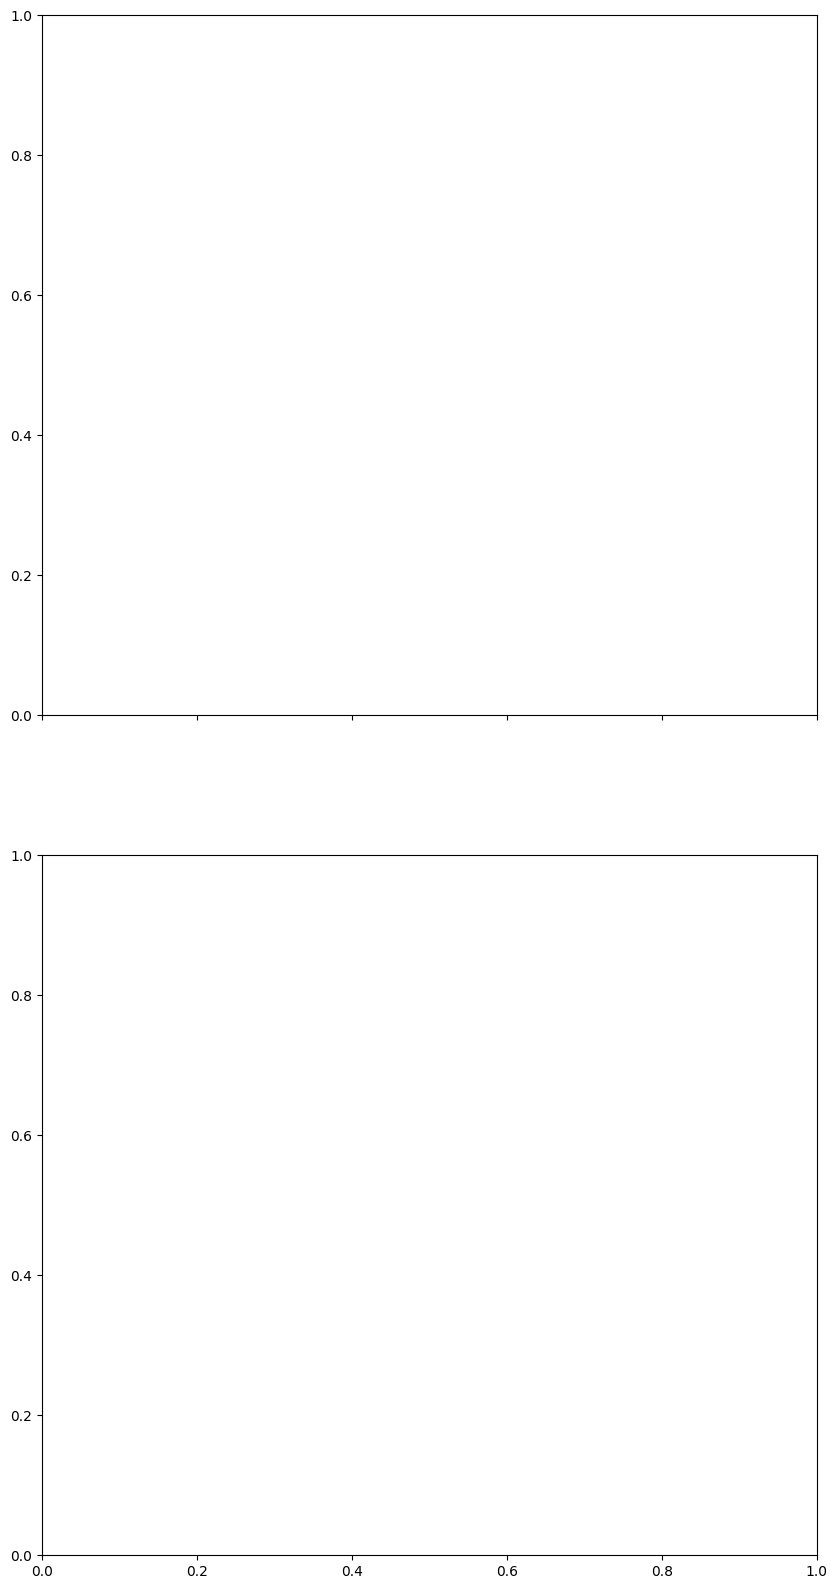

In [9]:
import matplotlib.pyplot as plt
import numpy as np
fig_height = 20
fig_width = 10

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(fig_width, fig_height), sharex=True, height_ratios=[1, 1])

# === Top plot: Thermal demand + reserve ===
gen = output_suc_case1.p.sum(axis=0)
res = output_suc_case1.reserve
reserve_deterministic = 0.05 * gen
reserve_extra = np.maximum(0, res - reserve_deterministic)

# deterministic reserve (base layer)
ax1.fill_between(
    x=np.arange(24),
    y1=gen,
    y2=gen + reserve_deterministic,
    color="green",
    edgecolor=None,
    alpha=0.4,
    zorder=0,
)

# extra reserve (stacked)
ax1.fill_between(
    x=np.arange(24),
    y1=gen + reserve_deterministic,
    y2=gen + res,
    color="green",
    edgecolor=None,
    alpha=0.2,
    zorder=0,
)

# thermal demand scenarios
ax1.plot(thermal_demand_scenario, c="blue", lw=1, alpha=0.5, zorder=1)

# mean scenario
# ax1.plot(thermal_demand_scenario.mean(axis=1), c="blue", lw=2, zorder=2)

# actual (forecasted) demand
ax1.plot(demand - renewable, c="red", lw=2.5, zorder=3)

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

# === Bottom plot: Price curves ===
ax2.plot(output_suc_case1.marginal_price_generation, color="black", lw=2, zorder=1)
ax2.plot(output_suc_case1.marginal_price_reserve, color="orange", lw=2, zorder=2)

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.tight_layout()


In [12]:
output_suc_case1.nse

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [13]:
case1 = output_suc_case1

In [14]:
case1.objval

47386742802.75002

In [15]:
case1.total_cost_reserve / 1e9

5.2865812991777155

In [16]:
output_suc_case1.total_cost

52673324101.927734

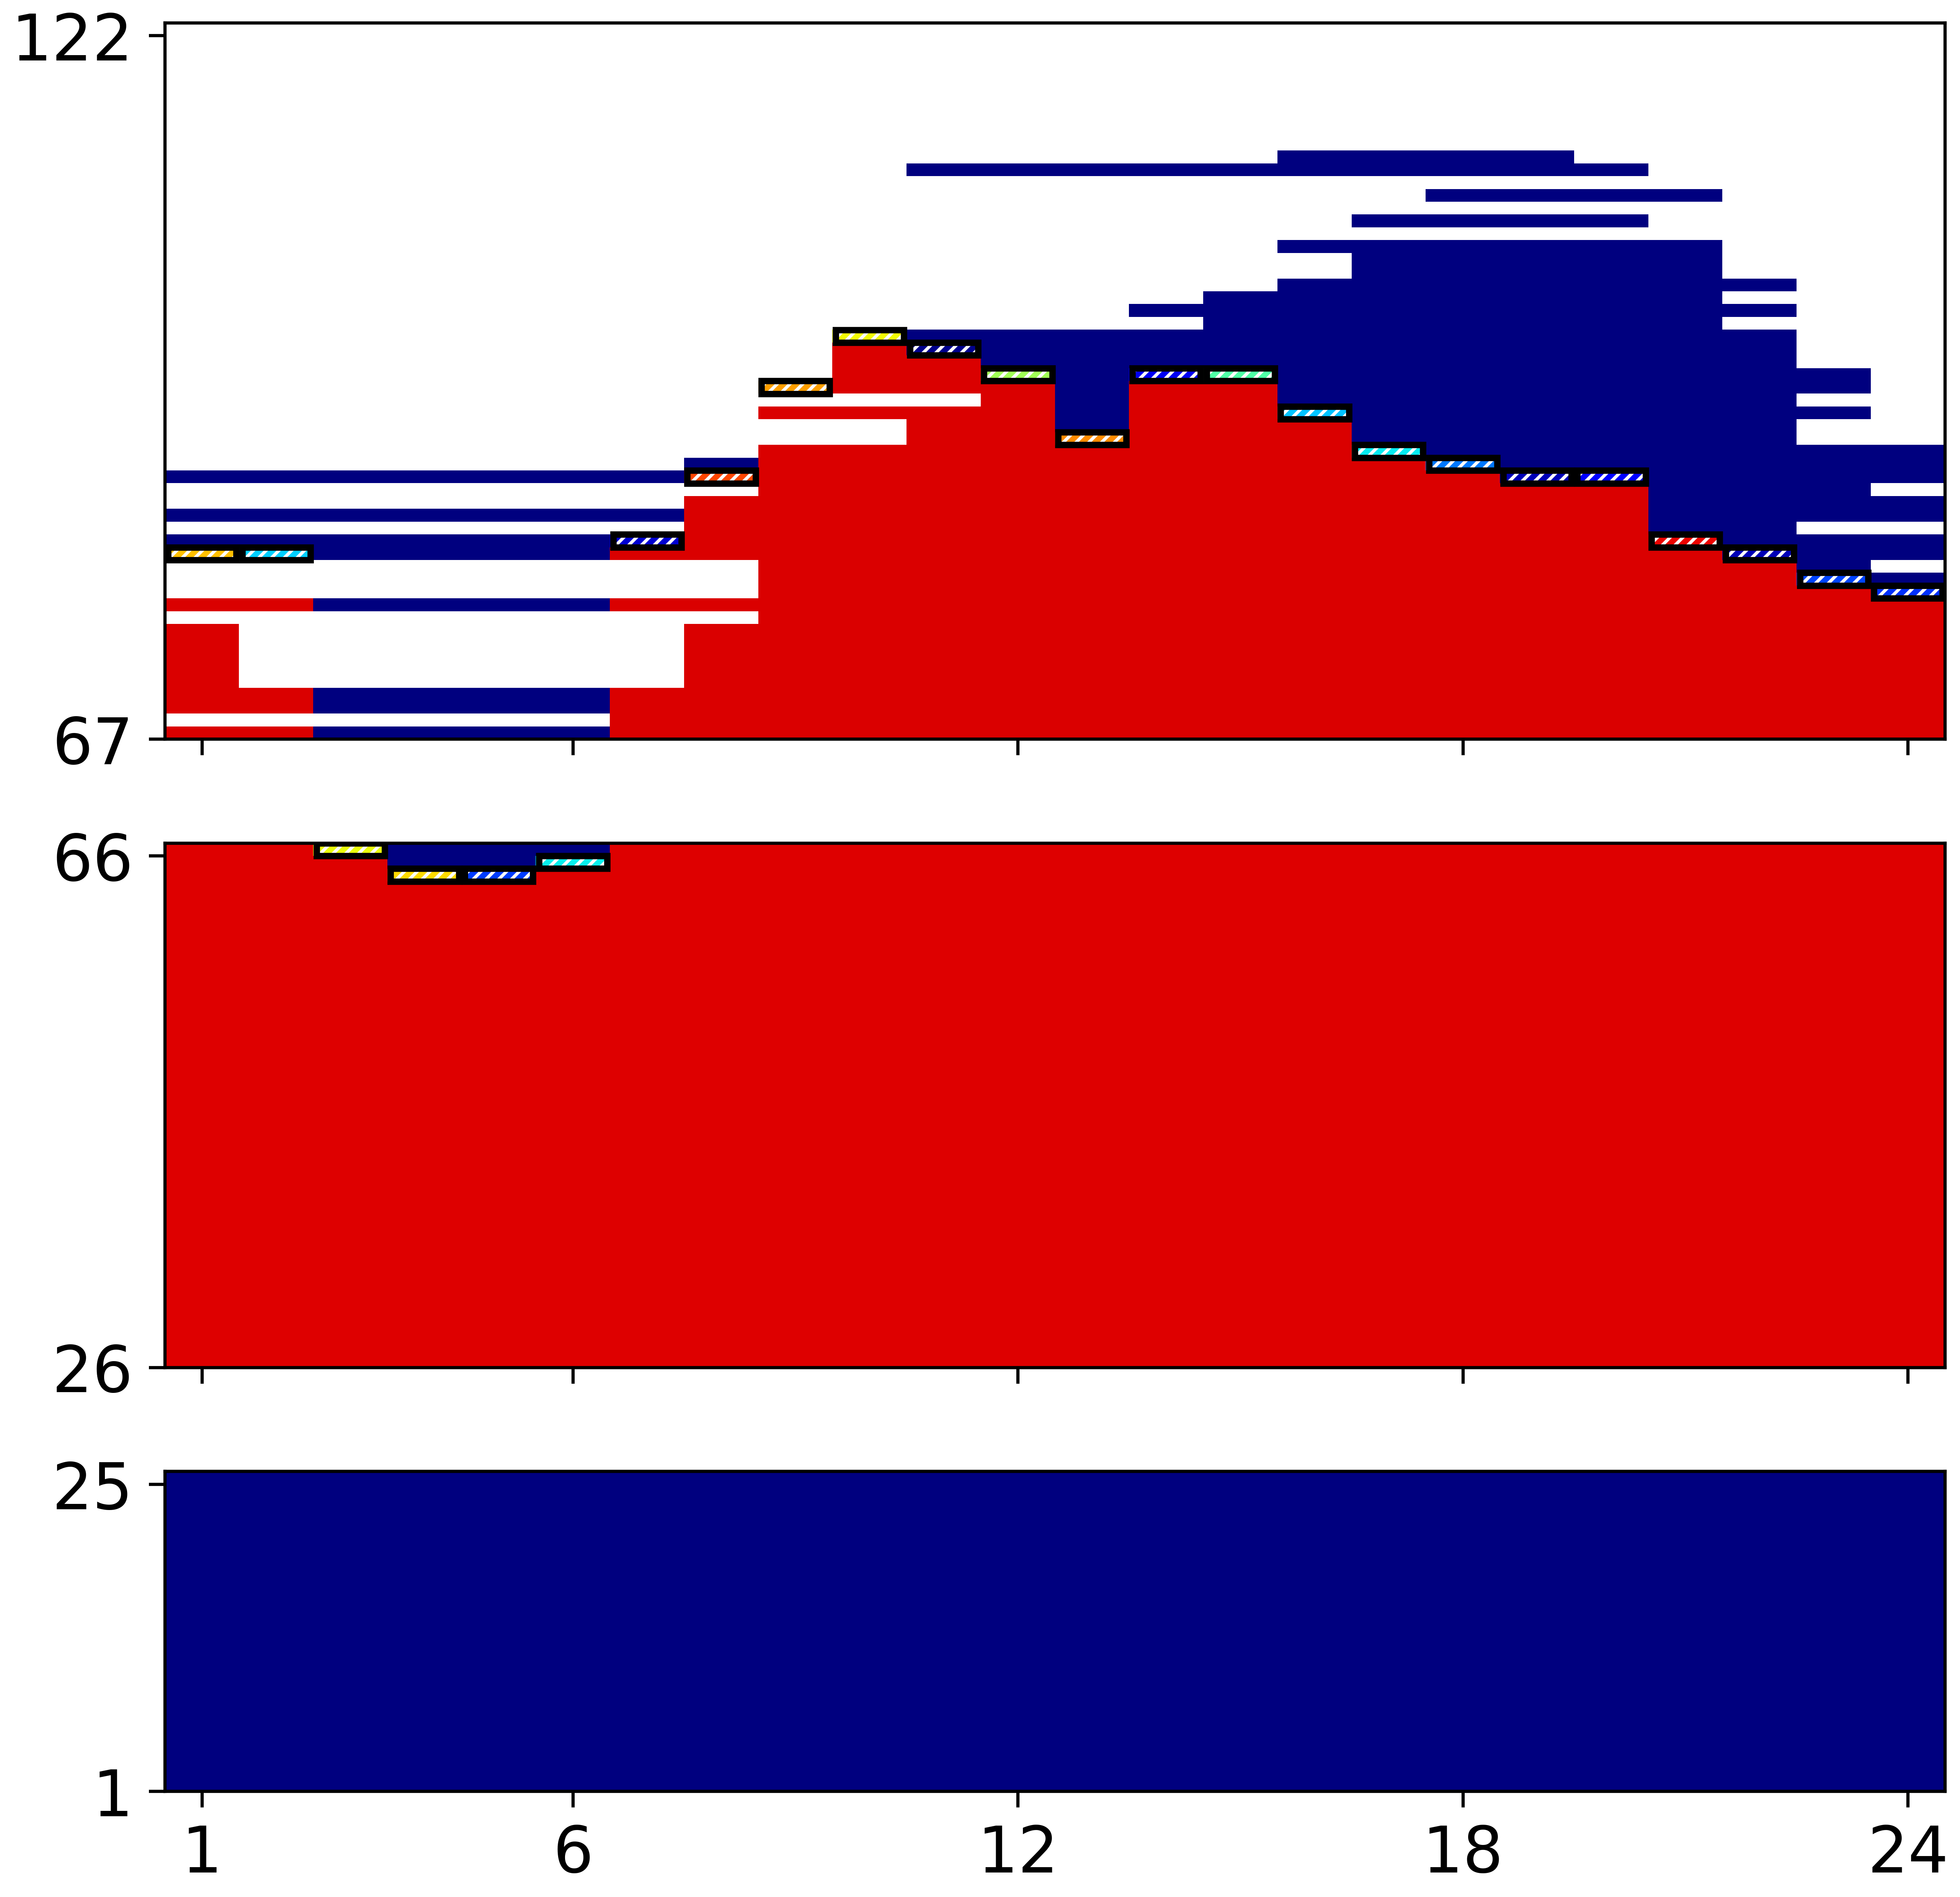

In [17]:
from src.plot import plot_schedule_heatmap
_ = plot_schedule_heatmap(input_uc=input_uc, output_uc=output_suc_case1, is_prev=False)

In [24]:
output_suc_case1.nse_scen

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0

In [ ]:
asdf

In [ ]:
asdf

In [ ]:
asdf

In [28]:
thermal_demand_scenario[:, 0]

array([57240.11321489, 55405.9193242 , 54277.18883315, 53654.2995061 ,
       53632.16836609, 54483.44653996, 56507.92863401, 59496.7847044 ,
       63703.51855091, 65119.05765438, 66719.00131062, 66473.42758159,
       65036.32860612, 67916.86505402, 69214.37933284, 70340.10888676,
       71864.94460813, 71454.05921956, 71097.15730751, 70706.56408607,
       69442.82696691, 67037.19994344, 64147.62061203, 62553.03800605])

In [11]:
input_suc_case2 = Input_suc(
    demand_fore=thermal_demand_scenario[:, 0], # lowest scenario 
    renewable_fore=np.zeros(num_periods),
    num_scenarios=6,
    thermal_demand_scenario=thermal_demand_scenario,
    scenario_p_weight=np.ones(6) / 6,
    voll=3500000,
    fr_margin_pu=0.02,
)

output_suc_case2 = Output_uc()
# solve_suc(
#     input_uc=input_uc,
#     input_suc=input_suc_case2,
#     output_suc=output_suc_case2,
#     verbose=True,
# )

# with open(path_ouptut / "output_suc_case2.pickle", "wb") as f:
#     pickle.dump(output_suc_case2, f, pickle.HIGHEST_PROTOCOL) # saving cus i will definitely have to restart this ipynb for orignal DUC stuffs


In [ ]:
solve_ed_after_suc(input_uc=input_uc, input_suc=input_suc_case2, output_suc=output_suc_case2, verbose=True)
# with open(path_ouptut / "output_suc_case2.pickle", "wb") as f:
#     pickle.dump(output_suc_case2, f, pickle.HIGHEST_PROTOCOL) # saving cus i will definitely have to restart this ipynb for orignal DUC stuffs


Set parameter OutputFlag to value 1
Set parameter Symmetry to value 2
Set parameter PreDual to value 2
Set parameter Presolve to value 1
Set parameter PreSparsify to value 2
Set parameter Disconnected to value 2
Set parameter Heuristics to value 1


Set parameter ProjImpliedCuts to value 2
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Arch Linux")

CPU model: 12th Gen Intel(R) Core(TM) i7-12700, instruction set [SSE2|AVX|AVX2]
Thread count: 20 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
Disconnected  2
Heuristics  1
Symmetry  2
ProjImpliedCuts  2
PreDual  2
Presolve  1
PreSparsify  2

Optimize a model with 12880 rows, 2952 columns and 20276 nonzeros
Model fingerprint: 0x9eb3a9ef
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+03, 4e+06]
  Bounds range     [3e+01, 1e+03]
  RHS range        [1e+00, 2e+04]
Presolve removed 12856 rows and 1471 columns
Presolve time: 0.01s
Presolved: 24 rows, 1481 columns, 1481 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.1500005e+10   4.287267e+04   0.000000e+00      0s
      24    4.2089583e+10   0.000000e+00   0.000000e+00      0s

Solved in 24 iterations and 0.01 sec

In [42]:
import numpy as np

def fix_reserve_cost_and_price(input_uc, input_suc, output_suc):
    num_periods = output_suc.r.shape[1]
    num_units = output_suc.r.shape[0]

    output_suc.marginal_price_reserve = np.zeros(num_periods)
    output_suc.cost_reserve = np.zeros(num_periods)

    for t in range(num_periods):
        opp_cost = output_suc.marginal_price_generation[t] - np.array(input_uc.cost_lin)
        opp_cost = np.maximum(0, opp_cost)

        indices_with_nonzero_r = np.where(output_suc.r[:, t] > 0)[0]

        if len(indices_with_nonzero_r) == 0:
            output_suc.marginal_price_reserve[t] = 0.0
        else:
            i_marginal = indices_with_nonzero_r[np.argmax(opp_cost[indices_with_nonzero_r])]
            output_suc.marginal_price_reserve[t] = opp_cost[i_marginal]

        output_suc.cost_reserve[t] = np.sum(output_suc.r[:, t] * output_suc.marginal_price_reserve[t])

    output_suc.total_cost_reserve = float(np.sum(output_suc.cost_reserve))
    output_suc.cost = output_suc.cost_generation + output_suc.cost_startup + output_suc.cost_reserve
    output_suc.total_cost += output_suc.total_cost_reserve

    output_suc.reserve_percentage = output_suc.reserve / (input_suc.demand_fore - input_suc.renewable_fore) * 100

    return output_suc


In [51]:
input_uc.cost_lin

array([ 3338.642759,  3577.662996,  3708.17768 ,  4161.59826 ,
        4801.709639,  4944.308729,  5045.367131,  5086.512482,
        5095.755455,  5107.16125 ,  5264.17786 ,  5339.360046,
        5385.267407,  5388.186707,  5394.838185,  5435.158894,
        5485.537961,  5535.420409,  5724.725211,  5725.956486,
        5992.320854,  6048.387453,  7072.820045,  7611.356666,
        8292.257296, 22911.99596 , 22969.6403  , 23001.88453 ,
       23263.92503 , 23293.34293 , 23428.72105 , 23553.71598 ,
       23674.92985 , 23768.48326 , 23851.20778 , 23858.36416 ,
       23860.49012 , 23939.20955 , 24268.56934 , 24296.90952 ,
       24490.33832 , 24847.36387 , 25338.54588 , 25414.2174  ,
       25458.68003 , 25501.66189 , 25717.73146 , 25784.23435 ,
       25786.8722  , 25788.19927 , 25934.74864 , 25939.04663 ,
       26205.32122 , 26223.98471 , 26256.4005  , 26325.44964 ,
       26369.37889 , 26388.0225  , 26560.57184 , 26607.723   ,
       26820.5252  , 26939.88995 , 26958.35981 , 26969.

In [47]:
tlqkf = fix_reserve_cost_and_price(input_uc, input_suc_case2, output_suc_case2)

In [48]:
with open(path_ouptut / "output_suc_case2.pickle", "rb") as f:
    output_suc_case2 = pickle.load(f) # saving cus i will definitely have to restart this ipynb for orignal DUC stuffs

# output_suc_case2

In [49]:
output_suc_case2.marginal_price_reserve

array([22596.105881, 22448.229441, 22379.088701, 22163.019131,
       22120.037271, 22379.088701, 22600.403871, 22885.341951,
       22986.806881, 22917.757741, 22986.806881, 22917.757741,
       22600.403871, 23030.736131, 23049.379741, 23221.929081,
       23481.882441, 23269.080241, 23221.929081, 23221.929081,
       23030.736131, 23030.736131, 23049.379741, 23221.929081])

In [50]:
tlqkf.marginal_price_reserve

array([22596.105881, 22448.229441, 22379.088701, 22163.019131,
       22120.037271, 22379.088701, 22600.403871, 22885.341951,
       22986.806881, 22917.757741, 22986.806881, 22917.757741,
       22600.403871, 23030.736131, 23049.379741, 23221.929081,
       23481.882441, 23269.080241, 23221.929081, 23221.929081,
       23030.736131, 23030.736131, 23049.379741, 23221.929081])

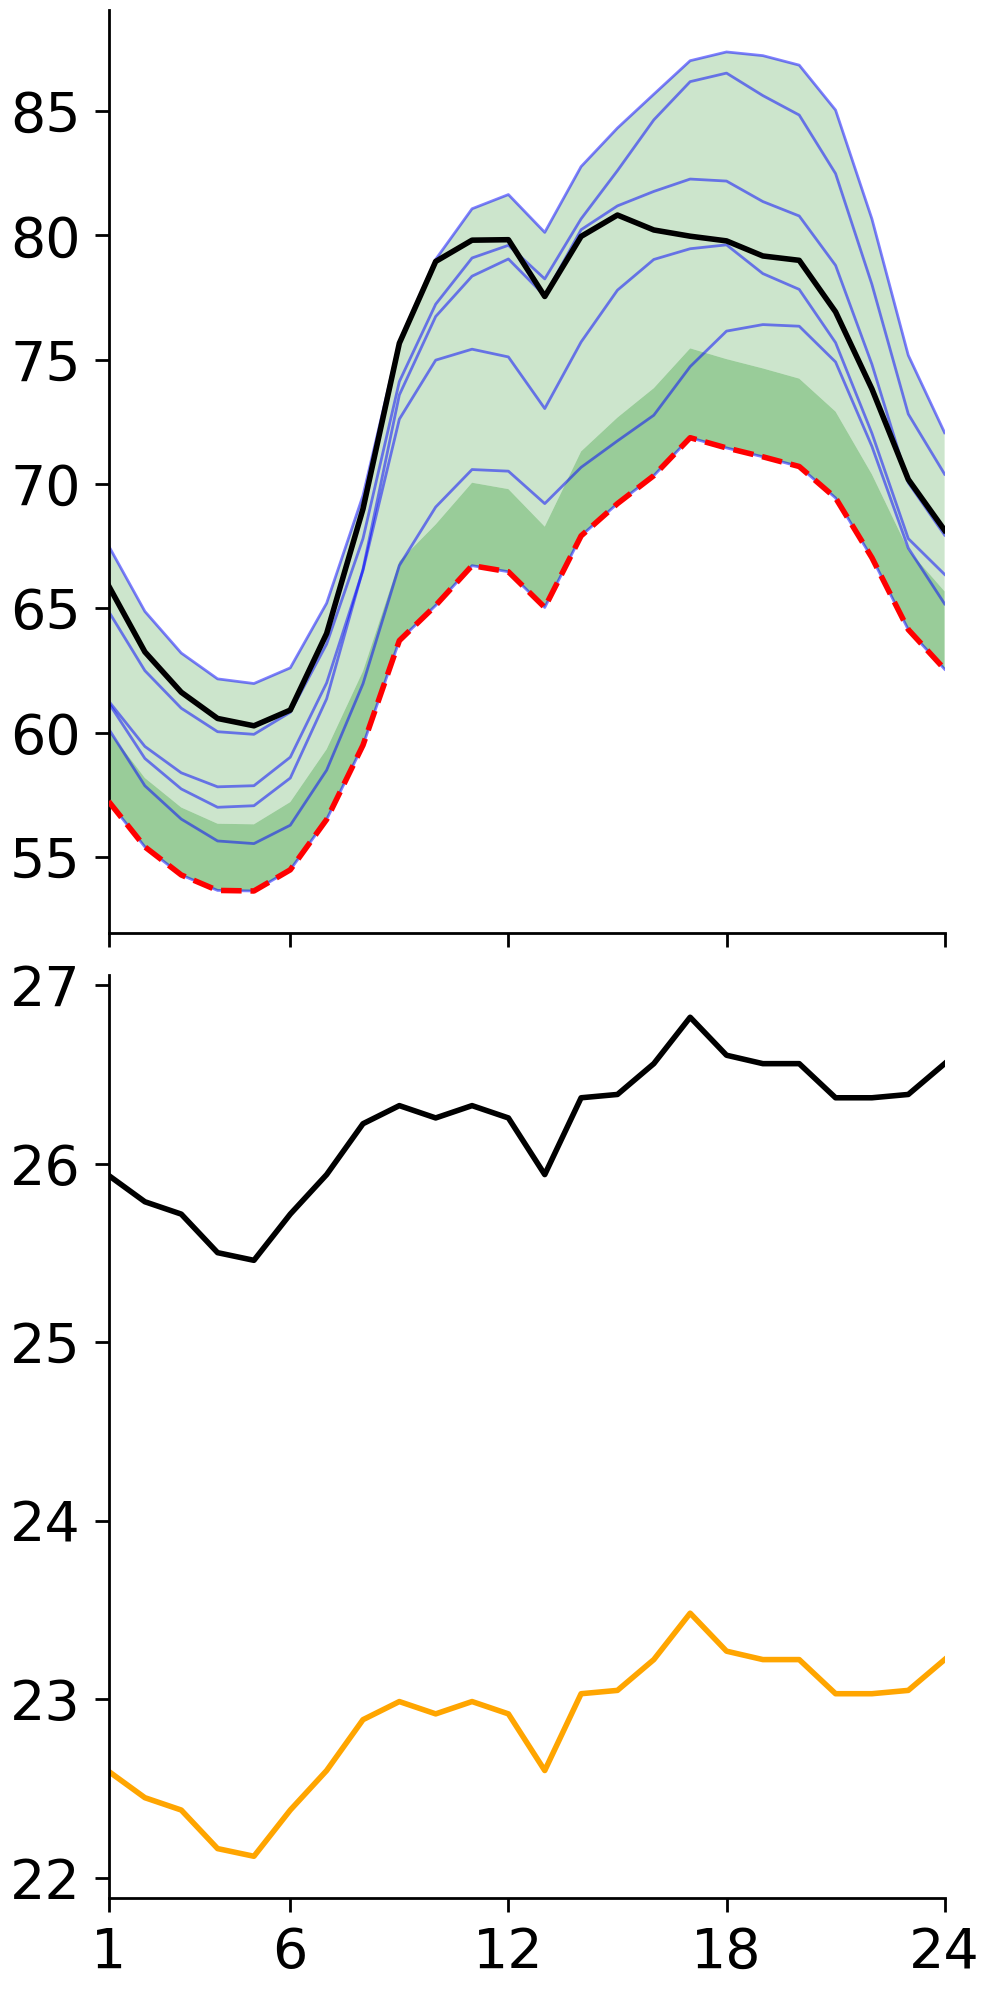

In [45]:
import matplotlib.pyplot as plt
import numpy as np
fig_height = 20
fig_width = 10

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(fig_width, fig_height), sharex=True, height_ratios=[1, 1])

# === Top plot: Thermal demand + reserve ===
gen = output_suc_case2.p.sum(axis=0) / 1000
res = output_suc_case2.reserve / 1000
reserve_deterministic = 0.05 * gen
reserve_extra = np.maximum(0, res - reserve_deterministic)

# deterministic reserve (base layer)
ax1.fill_between(
    x=np.arange(24),
    y1=gen,
    y2=gen + reserve_deterministic,
    color="green",
    edgecolor=None,
    alpha=0.4,
    zorder=0,
)

# extra reserve (stacked)
ax1.fill_between(
    x=np.arange(24),
    y1=gen + reserve_deterministic,
    y2=gen + res,
    color="green",
    edgecolor=None,
    alpha=0.2,
    zorder=0,
)

# thermal demand scenarios
ax1.plot(thermal_demand_scenario / 1000, c="blue", lw=2, alpha=0.5, zorder=1)

# mean scenario
# ax1.plot(thermal_demand_scenario.mean(axis=1), c="blue", lw=2, zorder=2)

# actual (forecasted) demand
ax1.plot((demand - renewable) / 1000, c="black", lw=4, zorder=3)
ax1.plot(input_suc_case2.demand_fore / 1000, c="red", lw=4, zorder=4, ls="--") # rnewable is 0 thats the thermal demand

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

# === Bottom plot: Price curves ===
ax2.plot(output_suc_case2.marginal_price_generation / 1000, color="black", lw=4, zorder=1)
ax2.plot(output_suc_case2.marginal_price_reserve / 1000, color="orange", lw=4, zorder=2)

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)


for ax in [ax1, ax2]:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    for side in ["bottom", "left"]:
        ax.spines[side].set_linewidth(fig_height / 10)

    ax.tick_params(
        axis="both",
        width=fig_height / 10,
        length=fig_height / 2,
        pad=fig_height / 2,
        labelsize=fig_height * 2,
    )


ax2.set_xlim(0, 23)
ax2.set_xticks([0, 5, 11, 17, 23])
ax2.set_xticklabels(np.array([0, 5, 11, 17, 23]) + 1)
plt.tight_layout()


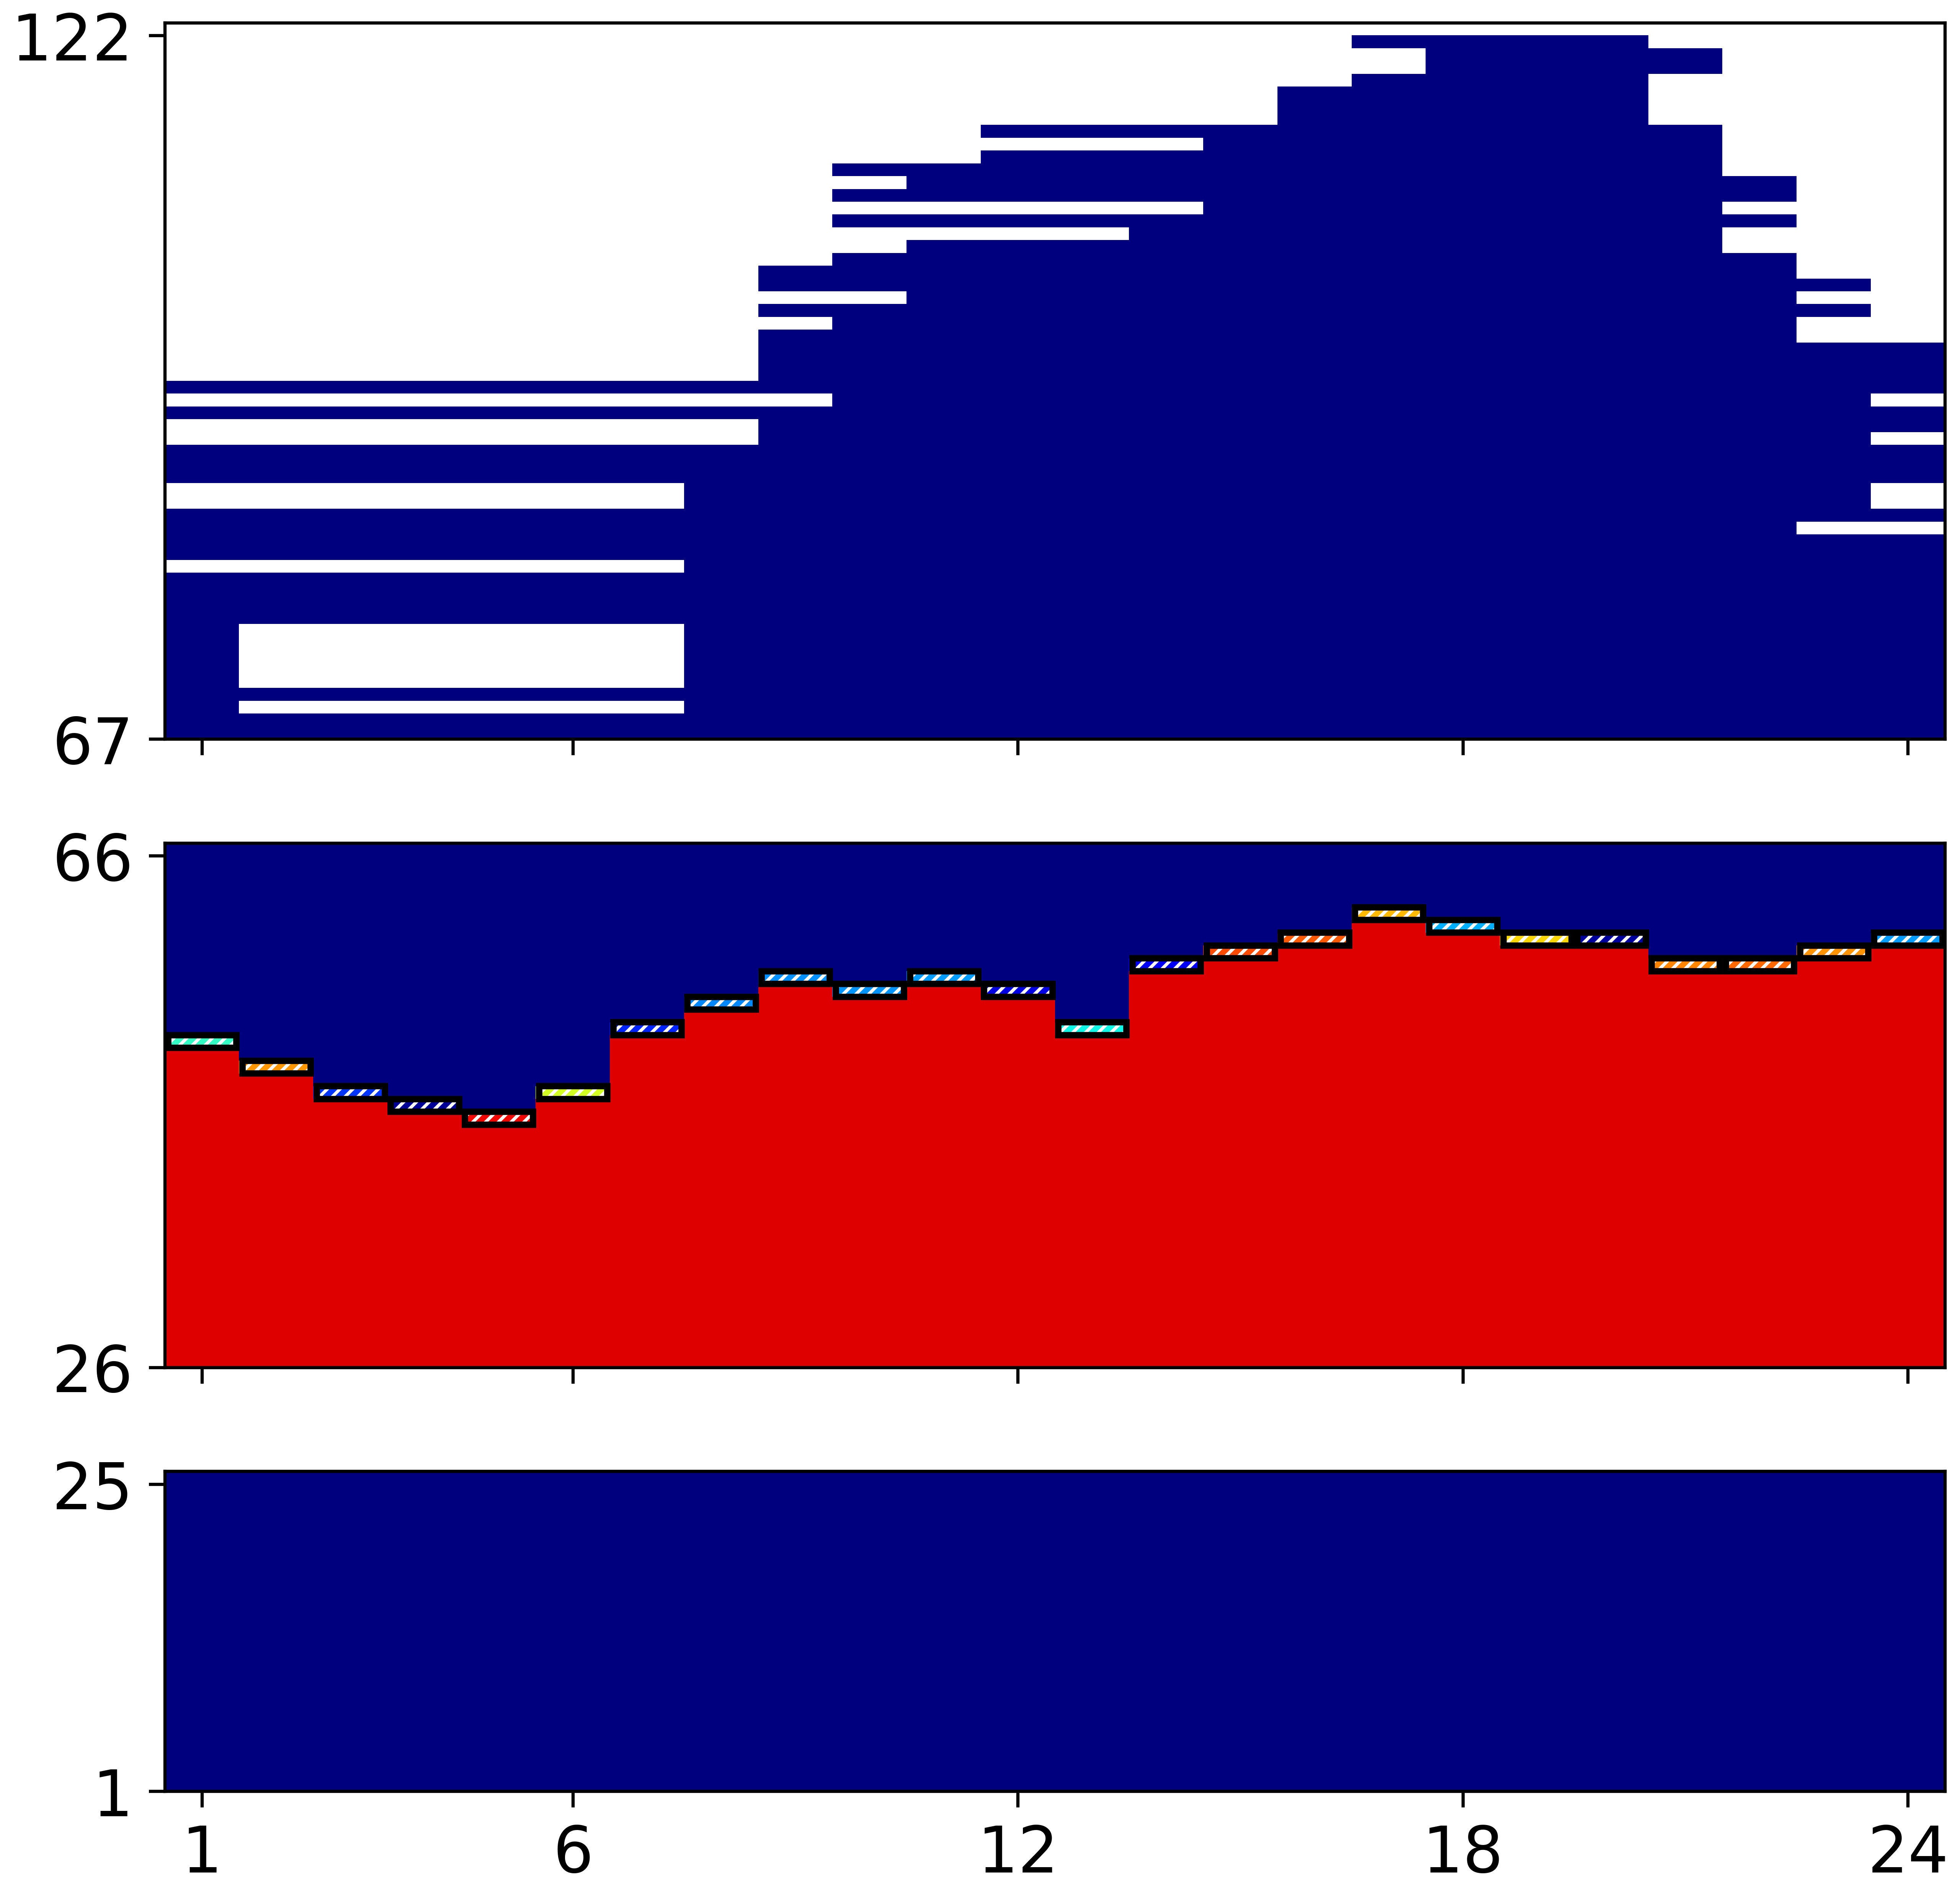

In [46]:
from src.plot import plot_schedule_heatmap
_ = plot_schedule_heatmap(input_uc=input_uc, output_uc=output_suc_case2, is_prev=False)

In [39]:
input_suc_case3 = Input_suc(
    demand_fore=thermal_demand_scenario[:, -1], # HiHGEST SCNEARIO
    renewable_fore=np.zeros(num_periods),
    num_scenarios=6,
    thermal_demand_scenario=thermal_demand_scenario,
    scenario_p_weight=np.ones(6) / 6,
    voll=3500000,
    fr_margin_pu=0.02,
)

output_suc_case3 = Output_uc()
# solve_suc(
#     input_uc=input_uc,
#     input_suc=input_suc_case3,
#     output_suc=output_suc_case3,
#     verbose=True,
# )

# with open(path_ouptut / "output_suc_case3.pickle", "wb") as f:
#     pickle.dump(output_suc_case3, f, pickle.HIGHEST_PROTOCOL) # saving cus i will definitely have to restart this ipynb for orignal DUC stuffs

# solve_ed_after_suc(input_uc=input_uc, input_suc=input_suc_case3, output_suc=output_suc_case3, verbose=True)
# with open(path_ouptut / "output_suc_case3.pickle", "wb") as f:
#     pickle.dump(output_suc_case3, f, pickle.HIGHEST_PROTOCOL) # saving cus i will definitely have to restart this ipynb for orignal DUC stuffs


with open(path_ouptut / "output_suc_case3.pickle", "rb") as f:
    output_suc_case3 = pickle.load(f) # saving cus i will definitely have to restart this ipynb for orignal DUC stuffs

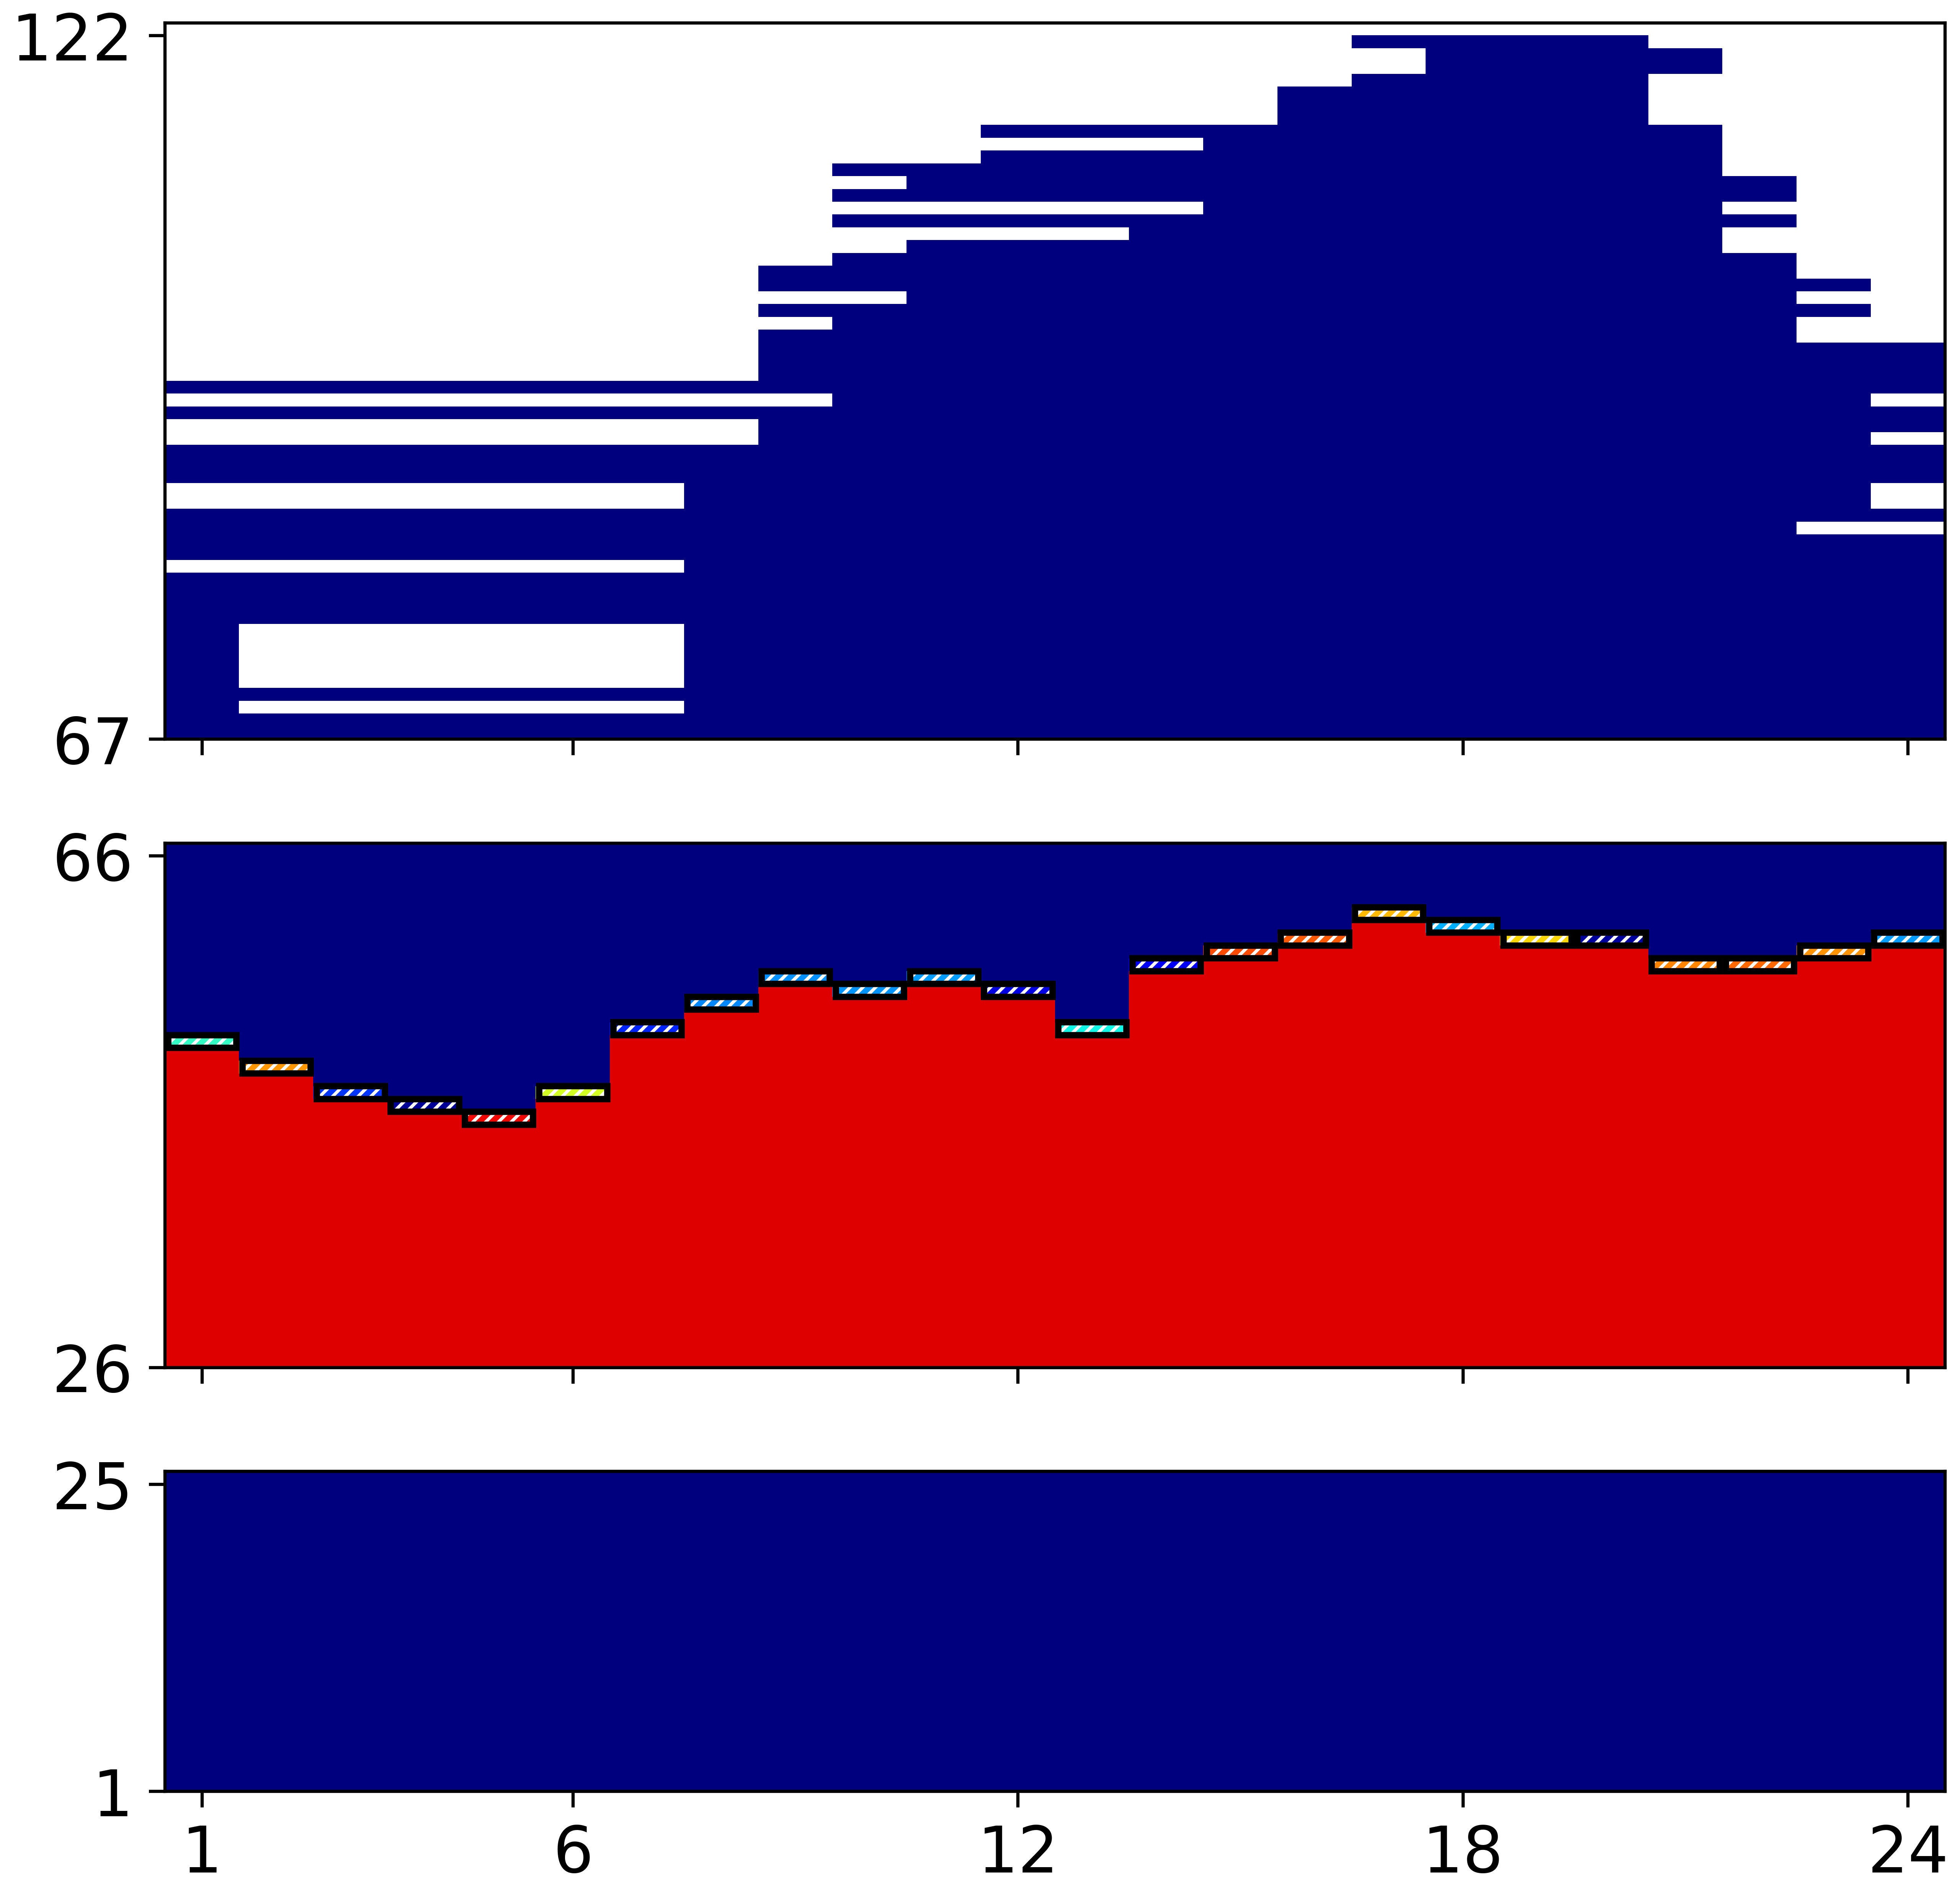

In [40]:
from src.plot import plot_schedule_heatmap
_ = plot_schedule_heatmap(input_uc=input_uc, output_uc=output_suc_case3, is_prev=False)

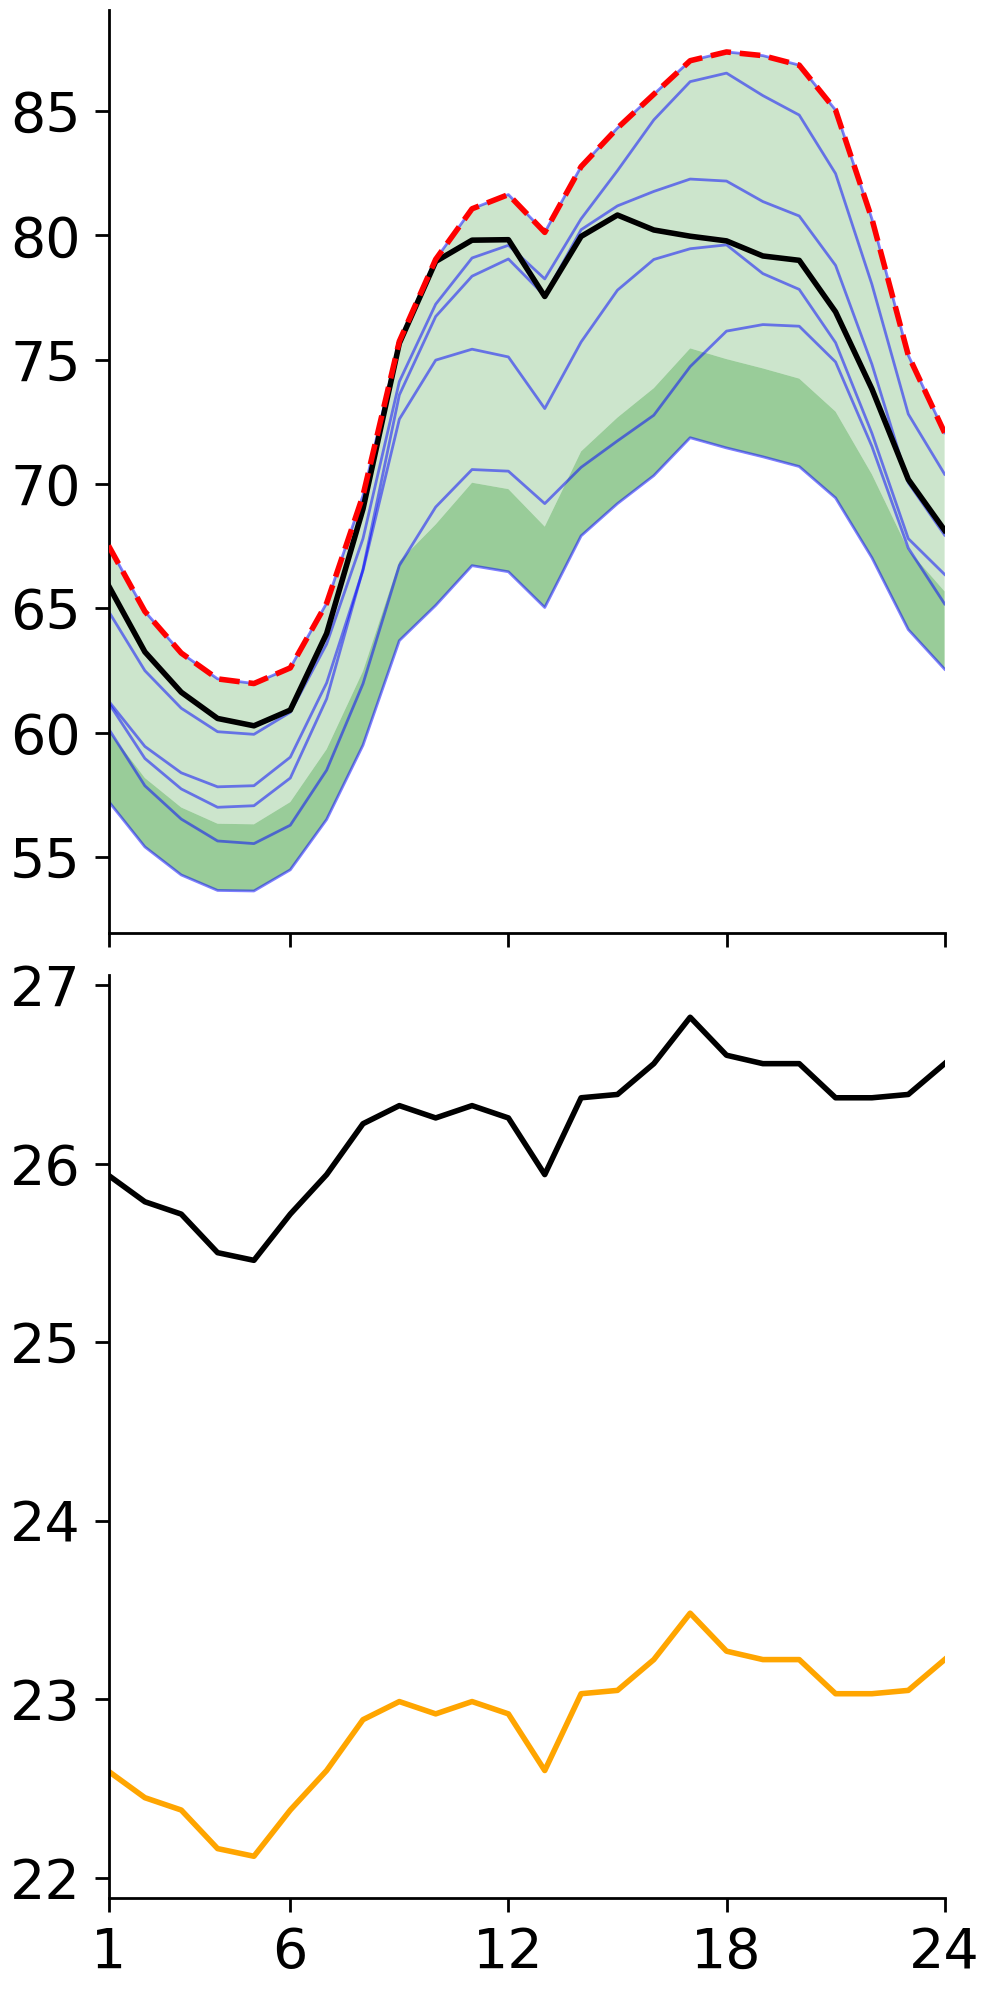

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig_height = 20
fig_width = 10

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(fig_width, fig_height), sharex=True, height_ratios=[1, 1])

# === Top plot: Thermal demand + reserve ===
gen = output_suc_case3.p.sum(axis=0) / 1000
res = output_suc_case3.reserve / 1000
reserve_deterministic = 0.05 * gen
reserve_extra = np.maximum(0, res - reserve_deterministic)

# deterministic reserve (base layer)
ax1.fill_between(
    x=np.arange(24),
    y1=gen,
    y2=gen + reserve_deterministic,
    color="green",
    edgecolor=None,
    alpha=0.4,
    zorder=0,
)

# extra reserve (stacked)
ax1.fill_between(
    x=np.arange(24),
    y1=gen + reserve_deterministic,
    y2=gen + res,
    color="green",
    edgecolor=None,
    alpha=0.2,
    zorder=0,
)

# thermal demand scenarios
ax1.plot(thermal_demand_scenario / 1000, c="blue", lw=2, alpha=0.5, zorder=1)

# mean scenario
# ax1.plot(thermal_demand_scenario.mean(axis=1), c="blue", lw=2, zorder=2)

# actual (forecasted) demand
ax1.plot((demand - renewable) / 1000, c="black", lw=4, zorder=3)
ax1.plot(input_suc_case3.demand_fore / 1000, c="red", lw=4, zorder=4, ls="--") # rnewable is 0 thats the thermal demand

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

# === Bottom plot: Price curves ===
ax2.plot(output_suc_case3.marginal_price_generation / 1000, color="black", lw=4, zorder=1)
ax2.plot(output_suc_case3.marginal_price_reserve / 1000, color="orange", lw=4, zorder=2)

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)


for ax in [ax1, ax2]:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    for side in ["bottom", "left"]:
        ax.spines[side].set_linewidth(fig_height / 10)

    ax.tick_params(
        axis="both",
        width=fig_height / 10,
        length=fig_height / 2,
        pad=fig_height / 2,
        labelsize=fig_height * 2,
    )


ax2.set_xlim(0, 23)
ax2.set_xticks([0, 5, 11, 17, 23])
ax2.set_xticklabels(np.array([0, 5, 11, 17, 23]) + 1)
plt.tight_layout()
# if you thikn this is mess imagine my life right now 
# i kept running the cell with WB for the case 1 instead of rb so i am solivng like 3 times rn it wont happen again cus i downloadwed to local  for the rest

---
---
---

In [ ]:
# voll experiment 
input_suc_case4 = Input_suc(
    demand_fore=demand,
    renewable_fore=renewable,
    num_scenarios=6,
    thermal_demand_scenario=thermal_demand_scenario,
    scenario_p_weight=np.ones(6) / 6,
    voll=350000,
    fr_margin_pu=0.02,
)

output_suc_case4 = Output_uc()
solve_suc(
    input_uc=input_uc,
    input_suc=input_suc_case4,
    output_suc=output_suc_case4,
    verbose=True,
)

# with open(path_ouptut / "output_suc_case4.pickle", "wb") as f:
#     pickle.dump(output_suc_case4, f, pickle.HIGHEST_PROTOCOL) # saving cus i will definitely have to restart this ipynb for orignal DUC stuffs

# solve_ed_after_suc(input_uc=input_uc, input_suc=input_suc_case4, output_suc=output_suc_case4, verbose=True)
# with open(path_ouptut / "output_suc_case4.pickle", "wb") as f:
#     pickle.dump(output_suc_case4, f, pickle.HIGHEST_PROTOCOL) # saving cus i will definitely have to restart this ipynb for orignal DUC stuffs


Set parameter OutputFlag to value 1
Set parameter Symmetry to value 2
Set parameter PreDual to value 2
Set parameter Presolve to value 1
Set parameter PreSparsify to value 2
Set parameter Disconnected to value 2
Set parameter Heuristics to value 1
Set parameter ProjImpliedCuts to value 2
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Arch Linux")

CPU model: 12th Gen Intel(R) Core(TM) i7-12700, instruction set [SSE2|AVX|AVX2]
Thread count: 20 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
Disconnected  2
Heuristics  1
Symmetry  2
ProjImpliedCuts  2
PreDual  2
Presolve  1
PreSparsify  2

Optimize a model with 105622 rows, 38376 columns and 379337 nonzeros
Model fingerprint: 0xf80b8a9d
Variable types: 20808 continuous, 17568 integer (17568 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [6e+02, 6e+07]
  Bounds range     [1e+00, 1e+03]
  RHS range        [1e+00, 9e+04]
Sparsify removed 2170 nonzeros

In [55]:
output_suc_case4.cost_nse

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# voll experiment 
input_suc_case5 = Input_suc(
    demand_fore=demand, # lowest scenario 
    renewable_fore=renewable,
    num_scenarios=6,
    thermal_demand_scenario=thermal_demand_scenario,
    scenario_p_weight=np.ones(6) / 6,
    voll=35000,
    fr_margin_pu=0.02,
)

output_suc_case5 = Output_uc()
solve_suc(
    input_uc=input_uc,
    input_suc=input_suc_case5,
    output_suc=output_suc_case5,
    verbose=True,
)

# with open(path_ouptut / "output_suc_case5.pickle", "wb") as f:
#     pickle.dump(output_suc_case5, f, pickle.HIGHEST_PROTOCOL) # saving cus i will definitely have to restart this ipynb for orignal DUC stuffs

# solve_ed_after_suc(input_uc=input_uc, input_suc=input_suc_case5, output_suc=output_suc_case5, verbose=True)
# with open(path_ouptut / "output_suc_case5.pickle", "wb") as f:
#     pickle.dump(output_suc_case5, f, pickle.HIGHEST_PROTOCOL) # saving cus i will definitely have to restart this ipynb for orignal DUC stuffs


Set parameter OutputFlag to value 1
Set parameter Symmetry to value 2
Set parameter PreDual to value 2
Set parameter Presolve to value 1
Set parameter PreSparsify to value 2
Set parameter Disconnected to value 2
Set parameter Heuristics to value 1
Set parameter ProjImpliedCuts to value 2
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Arch Linux")

CPU model: 12th Gen Intel(R) Core(TM) i7-12700, instruction set [SSE2|AVX|AVX2]
Thread count: 20 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
Disconnected  2
Heuristics  1
Symmetry  2
ProjImpliedCuts  2
PreDual  2
Presolve  1
PreSparsify  2

Optimize a model with 105622 rows, 38376 columns and 379337 nonzeros
Model fingerprint: 0x23310e9a
Variable types: 20808 continuous, 17568 integer (17568 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [6e+02, 6e+07]
  Bounds range     [1e+00, 1e+03]
  RHS range        [1e+00, 9e+04]
Sparsify removed 2170 nonzeros